# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [63]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.special import gamma
from scipy.stats import cauchy, norm, chi2
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

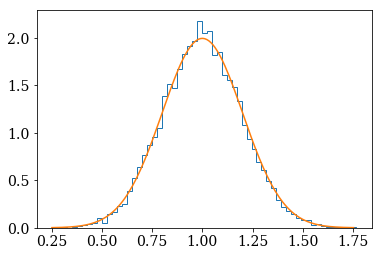

In [64]:
#Problem 2

#Setup initial variables from Gaussian
np.random.seed(0)
N = 10000
mu = 1
sigma = 0.2
x_gauss = norm(mu, sigma).rvs(N)

#True Gaussian distribution
xtrue_gauss = np.arange(x_gauss.min(), x_gauss.max(), 0.01)
ytrue_gauss = norm.pdf(xtrue_gauss, mu, sigma)

#Create histogram
_ = fancyhist(x_gauss, bins = "freedman", density = True, histtype = "step")
_ = plt.plot(xtrue_gauss, ytrue_gauss)

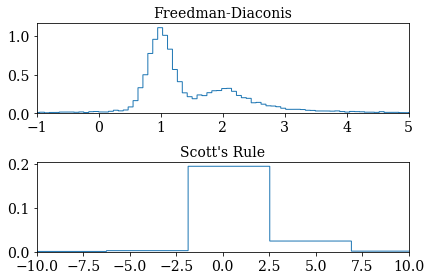

In [65]:
#Problem 3

#Setup initial variables from Cauchy
mu = 2
gamma = 0.5
x_cauchy = cauchy(mu, gamma).rvs(N)

#Combine with Gaussian from Q2
x_tot = np.concatenate([x_gauss, x_cauchy])

#Create histograms
plt.subplot(211)
plt.xlim([-1, 5])
plt.title("Freedman-Diaconis")
_ = fancyhist(x_tot, bins = "freedman", density = True, histtype = "step")
plt.subplot(212)
plt.xlim([-10, 10])
plt.title("Scott's Rule")
_ = fancyhist(x_tot, bins = "scott", density = True, histtype = "step")
plt.tight_layout()

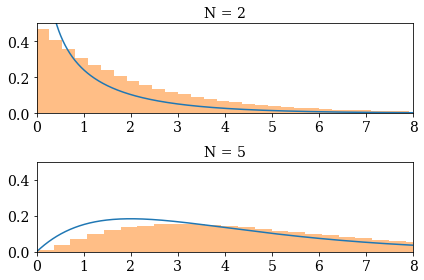

In [66]:
#Problem 4

#Setup initial variables
N = [2, 5]
mu = 0
sigma = 1
x_true = np.linspace(0, 8, 1000)
splot = 211

for n in N:
    #Average over 1,000,000 draws
    yy = []
    for i in np.arange(1000000):
        xx = np.random.normal(mu, sigma, n)
        yy.append(sum(xx**2))
        
    #Plot distribution and sample range
    plt.subplot(splot)
    plt.xlim([0, 8])
    plt.ylim([0, 0.5])
    _ = plt.plot(x_true, chi2.pdf(x_true, n - 1))
    _ = plt.hist(yy, bins = 100, histtype = 'stepfilled', alpha = 0.5, density = True)
    plt.title("N = {}".format(n))
    
    #Go to next subplot
    splot += 1
    
plt.tight_layout()